In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
company_list=['AAPL_data.csv','AMZN_data.csv','IBM_data.csv','GOOG_data.csv']

In [3]:
all_data=pd.DataFrame()

In [4]:
path='data/'

In [5]:
for file in company_list:
  current_df=pd.read_csv(path+file)
  all_data=pd.concat([all_data,current_df])

In [6]:
all_data.shape

(4752, 7)

In [ ]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
# analyse closing price of each company

In [9]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [10]:
all_data.date=pd.to_datetime(all_data.date)

In [11]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [12]:
tech_list=all_data.Name.unique()

In [13]:
tech_list

array(['AAPL', 'AMZN', 'IBM', 'GOOG'], dtype=object)

In [14]:
df=all_data[all_data.Name=='AAPL']

In [15]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


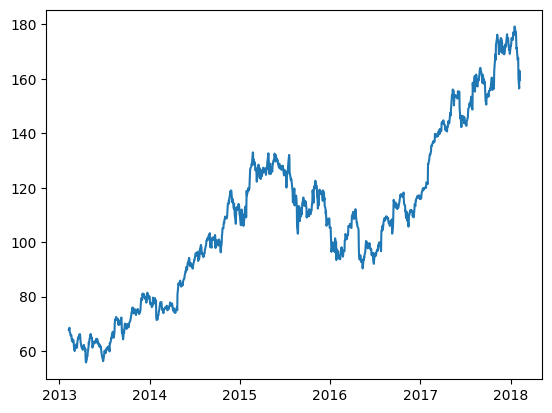

In [16]:
plt.plot(df.date, df.close)

In [17]:
for index, company in enumerate(tech_list):
  print(index, ' ', company)

0   AAPL
1   AMZN
2   IBM
3   GOOG


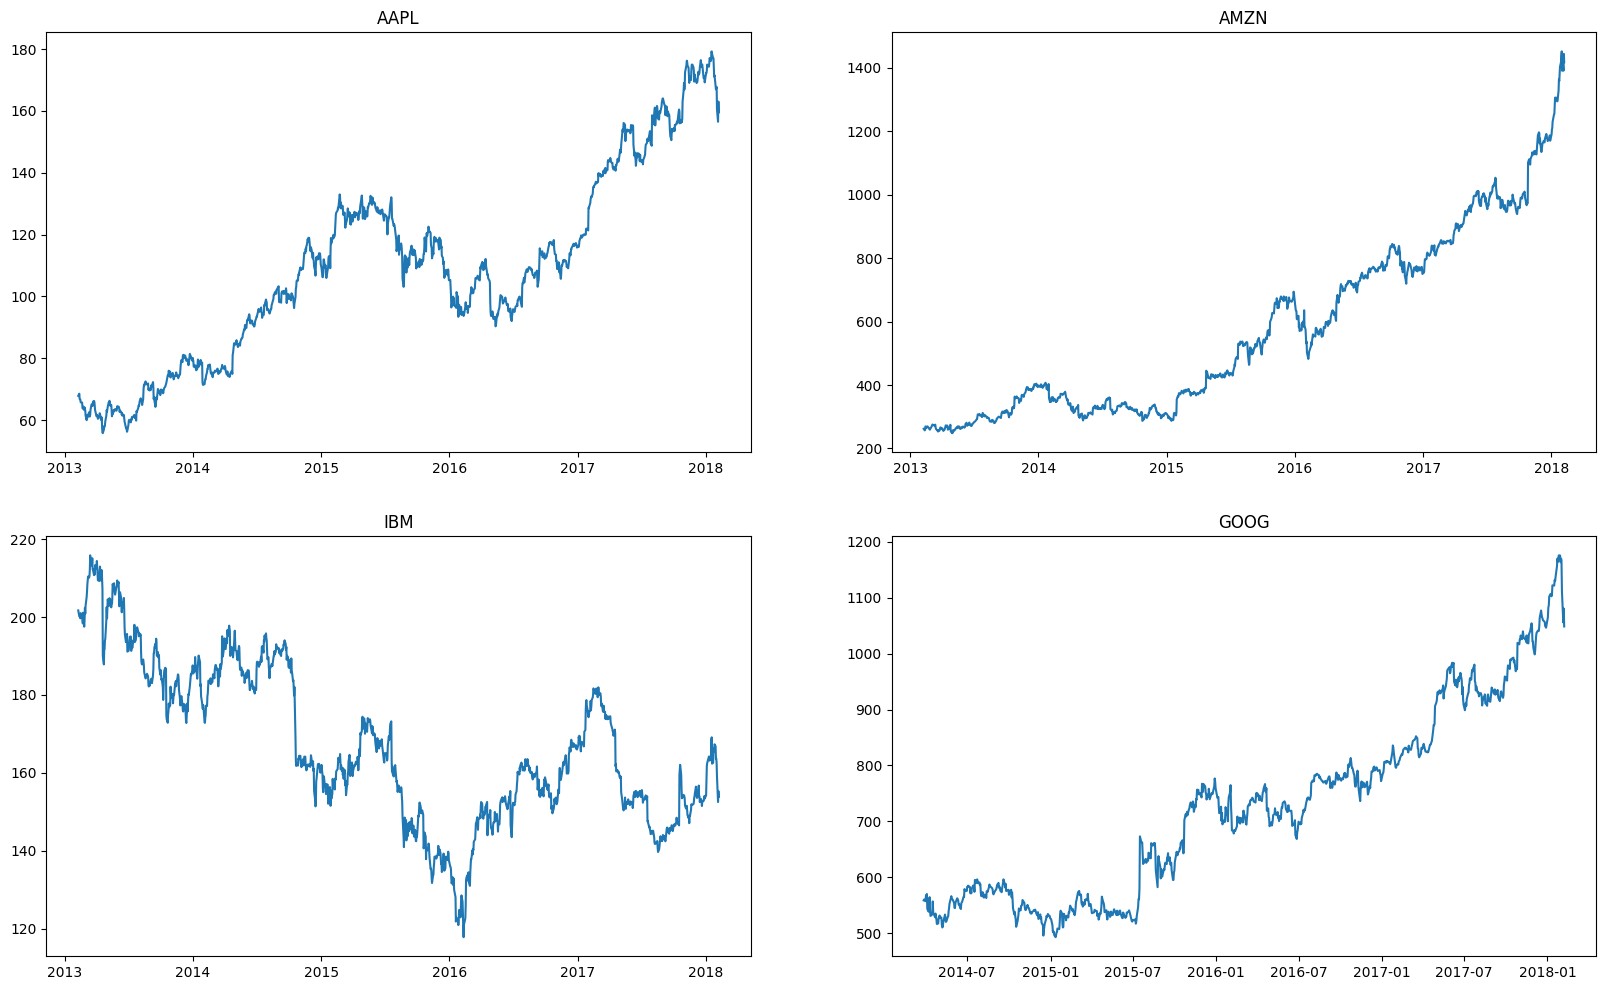

In [18]:
plt.figure(figsize=(20,12))
for index,company in  enumerate(tech_list,1):
   plt.subplot(2,2,index)
   df=all_data[all_data.Name==company]
   plt.plot(df.date,df.close)
   plt.title(company)

In [19]:
# analyse the total volume of stock being traded each day

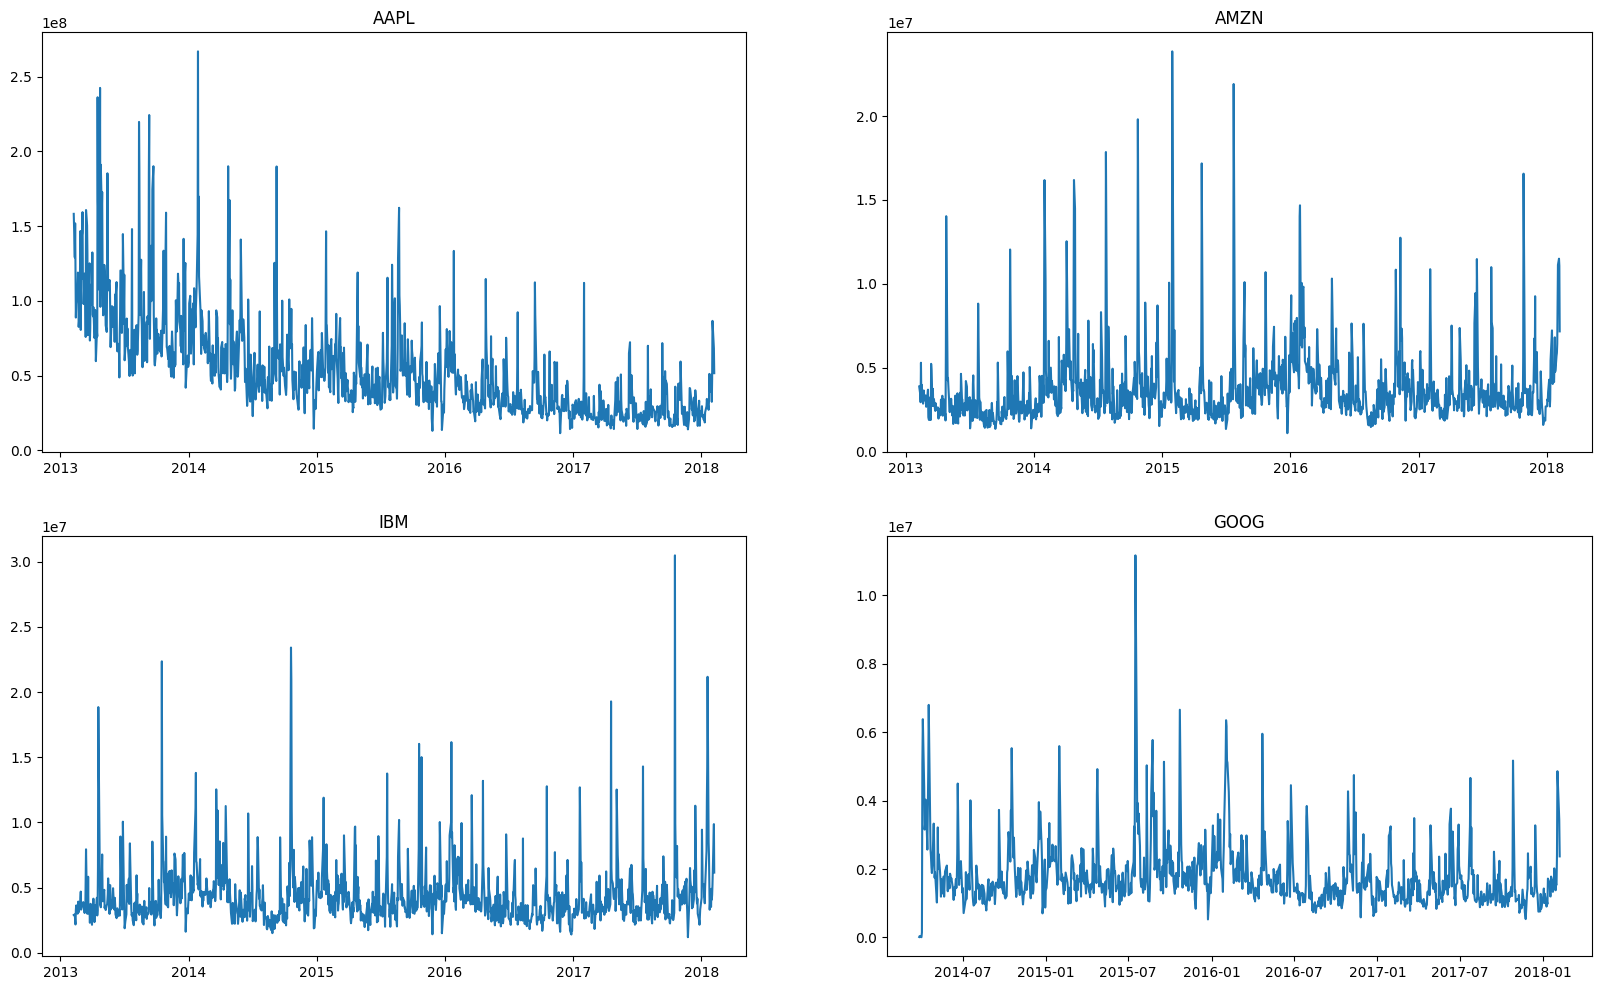

In [20]:
plt.figure(figsize=(20,12))
for index,company in  enumerate(tech_list,1):
   plt.subplot(2,2,index)
   df=all_data[all_data.Name==company]
   plt.plot(df.date,df.volume)
   plt.title(company)

In [21]:
import plotly.express as px

In [22]:
plt.figure(figsize=(20,12))
for index,company in  enumerate(tech_list,1):
   df=all_data[all_data.Name==company]
   fig=px.line(df,x='date',y='volume',title=company)
   fig.show()

<Figure size 2000x1200 with 0 Axes>

In [23]:
  # analyse daily price charge in stocks

In [24]:
df=pd.read_csv('data/AMZN_data.csv')

In [25]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [26]:
df['1day_return']=((df.close-df.open)/df.close)*100

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,1day_return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [ ]:
fig=px.line(df,x='date',y='1day_return',title='daily % change')
fig.show()

In [29]:
 df.head()

,date,open,high,low,close,volume,Name,1day_return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.]),
 [Text(-10.0, 0, '2016-04-18'),
  Text(0.0, 0, '2016-02-01'),
  Text(10.0, 0, '2016-02-16'),
  Text(20.0, 0, '2016-03-01'),
  Text(30.0, 0, '2016-03-15'),
  Text(40.0, 0, '2016-03-30'),
  Text(50.0, 0, '2016-04-13'),
  Text(60.0, 0, '2016-04-27'),
  Text(70.0, 0, '')])

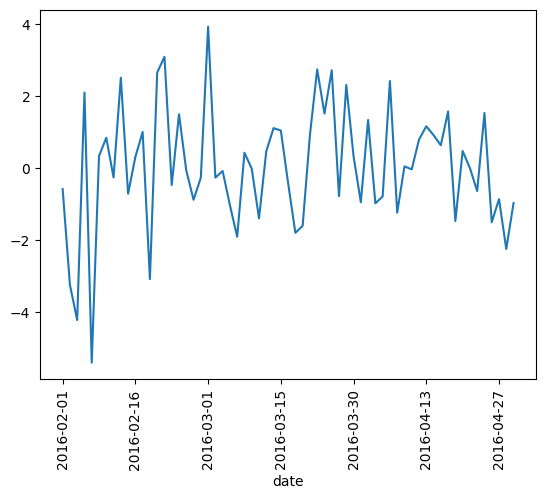

In [30]:
df.set_index('date')['2016-02-01':'2016-04-30']['1day_return'].plot()
plt.xticks(rotation='vertical')

In [31]:
# analysing monthly closing price

In [ ]:
df.head()

,date,open,high,low,close,volume,Name,1day_return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [33]:
df.dtypes

date            object
open           float64
high           float64
low            float64
close          float64
volume           int64
Name            object
1day_return    float64
dtype: object

In [34]:
df.date=pd.to_datetime(df.date)

In [35]:
df.date.dtype

dtype('<M8[ns]')

In [36]:
df.date[0]

Timestamp('2013-02-08 00:00:00')

In [37]:
df.set_index('date',inplace=True)

In [38]:
df.head()

,open,high,low,close,volume,Name,1day_return
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


C:\Users\modern14\AppData\Local\Temp\ipykernel_6264\3336009490.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



<Axes: xlabel='date'>

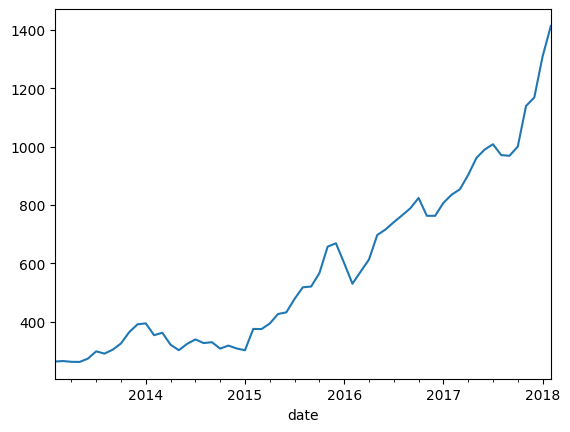

In [39]:
df.close.resample('M').mean().plot()

In [40]:
# analysing yearly closing price

C:\Users\modern14\AppData\Local\Temp\ipykernel_6264\1644515120.py:1: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.



<Axes: xlabel='date'>

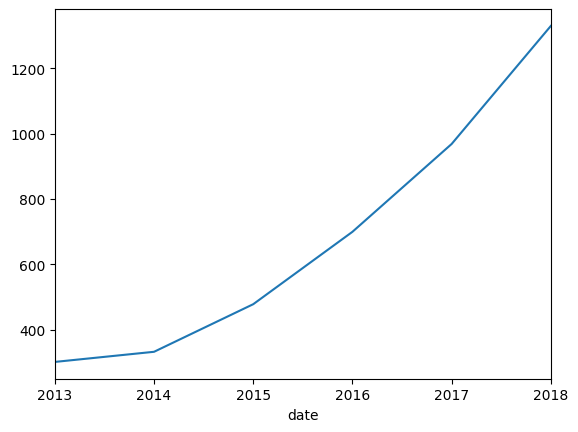

In [41]:
df.close.resample('Y').mean().plot()

In [42]:
# checking if the stock prices of these tech companies (Apple, Amazon, IBM, Google) are correlated or not

In [43]:
df.head()

,open,high,low,close,volume,Name,1day_return
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [44]:
company_list

['AAPL_data.csv', 'AMZN_data.csv', 'IBM_data.csv', 'GOOG_data.csv']

In [45]:
aapl=pd.read_csv(path+company_list[0])

In [46]:
aapl.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [47]:
amzn=pd.read_csv(path+company_list[1])
ibm=pd.read_csv(path+company_list[2])
goog=pd.read_csv(path+company_list[3])

In [48]:
close=pd.DataFrame()

In [49]:
close['aapl']=aapl.close
close['amzn']=amzn.close
close['ibm']=ibm.close
close['goog']=goog.close

In [50]:
close.head()

,aapl,amzn,ibm,goog
0,67.8542,261.95,201.68,558.46
1,68.5614,257.21,200.16,559.99
2,66.8428,258.70,200.04,556.97
3,66.7156,269.47,200.09,567.16
4,66.6556,269.24,199.65,567.00


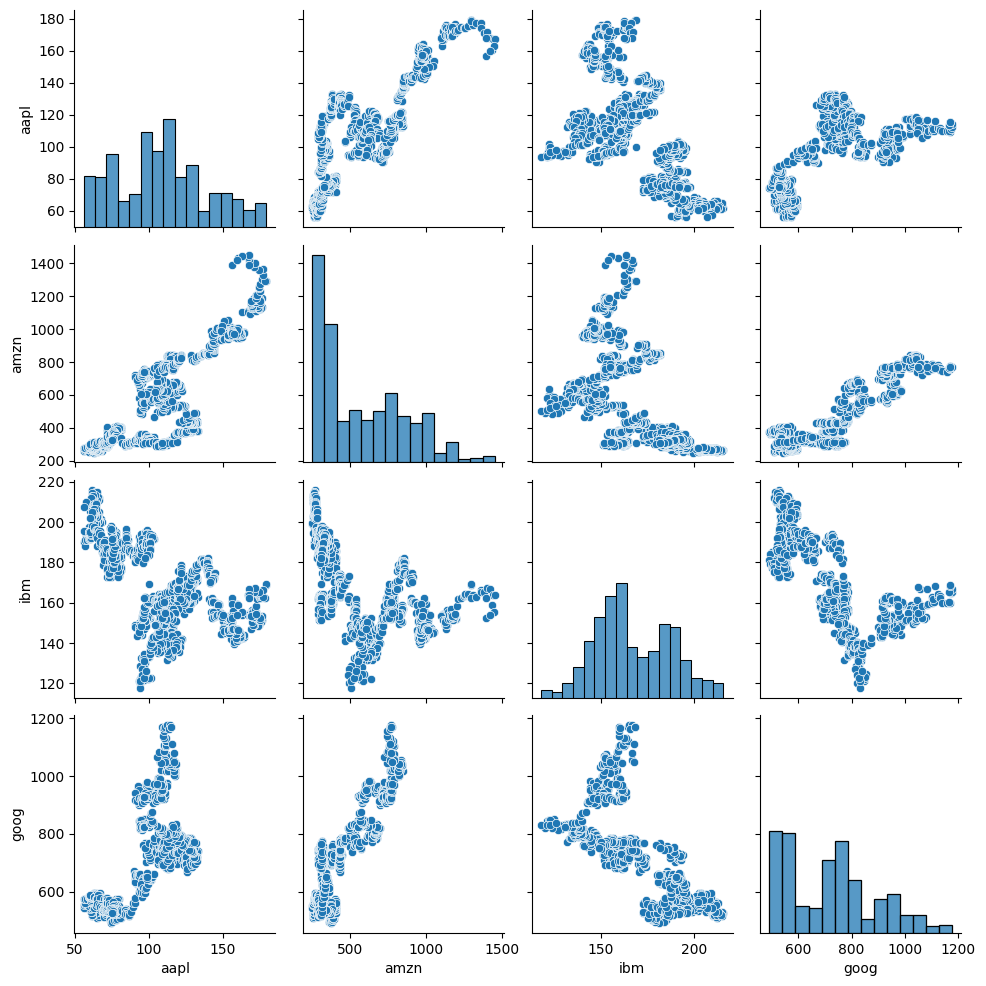

In [51]:
sns.pairplot(close)

<Axes: >

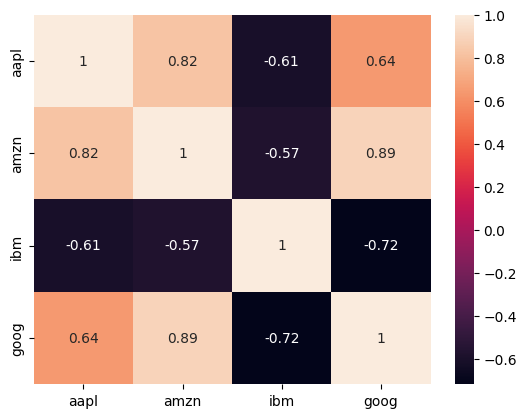

In [52]:
sns.heatmap(close.corr(),annot=True)

In [53]:
# analyse correlation of daily return of each stock

In [54]:
data=pd.DataFrame()

In [55]:
data['aapl_change']=((aapl.close-aapl.open)/aapl.close)*100
data['goog_change']=((goog.close-goog.open)/goog.close)*100
data['amzn_change']=((amzn.close-amzn.open)/amzn.close)*100
data['ibm_change']=((ibm.close-ibm.open)/ibm.close)*100

In [56]:
data.head()

,aapl_change,goog_change,amzn_change,ibm_change
0,0.206325,-1.708269,0.209964,0.847878
1,0.714688,-0.216075,-2.328836,-0.409672
2,-2.481344,-1.781065,-0.189409,0.014997
3,-0.042869,1.489879,2.946525,-0.279874
4,0.443624,0.334039,0.694548,-0.040070


<Axes: >

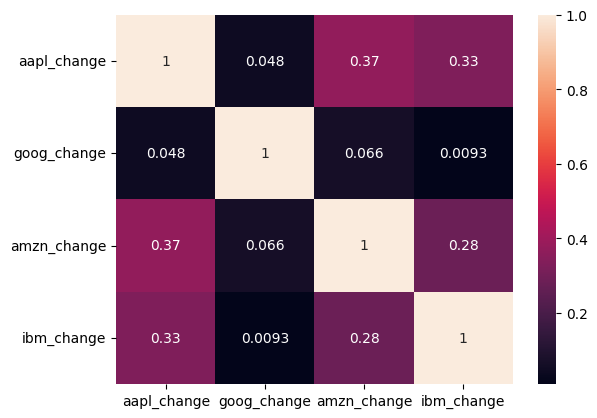

In [57]:
sns.heatmap(data.corr(), annot=True)

In [58]:
# value at risk analysis for apple

C:\Users\modern14\AppData\Local\Temp\ipykernel_6264\503702943.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='aapl_change', ylabel='Density'>

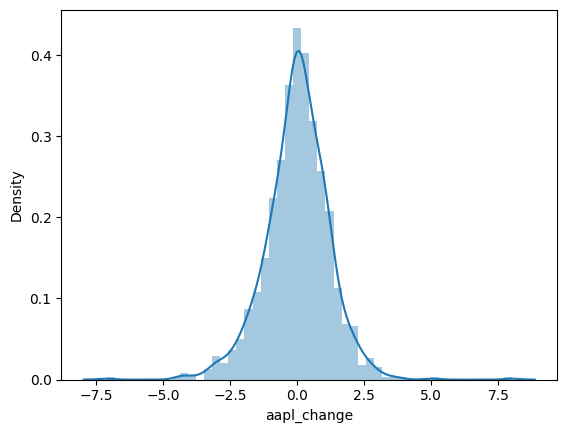

In [59]:
sns.distplot(data.aapl_change)

In [60]:
data.aapl_change.std()

np.float64(1.1871377131421237)

In [61]:
data.aapl_change.describe()

count    1259.000000
mean       -0.000215
std         1.187138
min        -7.104299
25%        -0.658021
50%         0.042230
75%         0.715427
max         8.000388
Name: aapl_change, dtype: float64

In [62]:
data.aapl_change.quantile(0.1)

np.float64(-1.4246644227944307)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
aapl_change,1259.0,-0.000215,1.187138,-7.104299,-0.658021,0.042230,0.715427,8.000388
goog_change,975.0,-0.012495,1.092560,-5.952266,-0.551963,0.024951,0.672649,4.943550
amzn_change,1259.0,-0.000398,1.358679,-9.363077,-0.738341,-0.002623,0.852568,5.640265
ibm_change,1259.0,0.013804,0.874552,-4.242338,-0.486742,0.006366,0.523663,3.250933


In [64]:
# perform in depth analysis of amazon

In [65]:
amzn.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


In [66]:
amzn_df=amzn.copy()

In [67]:
amzn_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [68]:
fig=px.line(amzn_df,x='date',y=['open', 'high', 'low', 'close'])
fig.show()

In [69]:
# relationship between moving average and closing price

In [70]:
amzn_df.close.head()

0    261.95
1    257.21
2    258.70
3    269.47
4    269.24
Name: close, dtype: float64

In [71]:
amzn_df['10_d_avg']=amzn_df.close.rolling(window=10).mean()
amzn_df['50_d_avg']=amzn_df.close.rolling(window=50).mean()
amzn_df['100_d_avg']=amzn_df.close.rolling(window=100).mean()

In [72]:
amzn_df.tail()

,date,open,high,low,close,volume,Name,10_d_avg,50_d_avg,100_d_avg
1254,2018-02-01,1445.00,1459.88,1385.14,1390.00,9113808,AMZN,1381.833,1231.8294,1127.3103
1255,2018-02-02,1477.39,1498.00,1414.00,1429.95,11125722,AMZN,1395.370,1237.9022,1131.8302
1256,2018-02-05,1402.62,1458.98,1320.72,1390.00,11494985,AMZN,1401.639,1242.9124,1135.9044
1257,2018-02-06,1361.46,1443.99,1351.79,1442.84,11066819,AMZN,1409.669,1248.6460,1140.3368
1258,2018-02-07,1449.00,1460.99,1415.15,1416.78,7162741,AMZN,1415.596,1253.2616,1144.5825


In [73]:
amzn_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', '10_d_avg',
       '50_d_avg', '100_d_avg'],
      dtype='object')

In [74]:
fig=px.line(amzn_df,x='date',y=['close','10_d_avg', '50_d_avg', '100_d_avg'])
fig.show()

In [75]:
# analysing amzn historical price

In [76]:
amzn_df.head()

,date,open,high,low,close,volume,Name,10_d_avg,50_d_avg,100_d_avg
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,NaN,NaN,NaN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,NaN,NaN,NaN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,NaN,NaN,NaN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,NaN,NaN,NaN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,NaN,NaN,NaN


In [77]:
amzn_df.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
volume         int64
Name          object
10_d_avg     float64
50_d_avg     float64
100_d_avg    float64
dtype: object

In [78]:
amzn_df.date=pd.to_datetime(amzn_df.date)

In [79]:
amzn_df.dtypes

date         datetime64[ns]
open                float64
high                float64
low                 float64
close               float64
volume                int64
Name                 object
10_d_avg            float64
50_d_avg            float64
100_d_avg           float64
dtype: object

In [80]:
import datetime as dt

In [81]:
last_year=amzn_df[amzn_df.date.dt.year>2017]

In [82]:
last_year.shape

(26, 10)

In [83]:
last_year

,date,open,high,low,close,volume,Name,10_d_avg,50_d_avg,100_d_avg
1233,2018-01-02,1172.00,1190.00,1170.51,1189.01,2694494,AMZN,1180.230,1133.7868,1053.0984
1234,2018-01-03,1188.30,1205.49,1188.30,1204.20,3108793,AMZN,1181.592,1138.2126,1055.5712
1235,2018-01-04,1205.00,1215.87,1204.66,1209.59,3022089,AMZN,1183.813,1143.0784,1057.9872
1236,2018-01-05,1217.51,1229.14,1210.00,1229.14,3544743,AMZN,1188.965,1148.1432,1060.4456
1237,2018-01-08,1236.00,1253.08,1232.03,1246.87,4279475,AMZN,1196.176,1153.6224,1063.0869
1238,2018-01-09,1256.90,1259.33,1241.76,1252.70,3661316,AMZN,1204.610,1159.2278,1065.8321
1239,2018-01-10,1245.15,1254.33,1237.23,1254.33,2686017,AMZN,1212.367,1162.2954,1068.7697
1240,2018-01-11,1259.74,1276.77,1256.46,1276.68,3125048,AMZN,1221.809,1165.6120,1071.9518
1241,2018-01-12,1273.39,1305.76,1273.39,1305.20,5443730,AMZN,1233.719,1169.6104,1075.4709
1242,2018-01-16,1323.00,1339.94,1292.30,1304.86,7220701,AMZN,1247.258,1173.6340,1078.8505


In [84]:
g=last_year.groupby('date')

In [85]:
monthly_average=g.aggregate({
    'open':np.mean,
    'close':np.mean,
    'high':np.mean,
    'low':np.mean
    })

C:\Users\modern14\AppData\Local\Temp\ipykernel_6264\2954197945.py:1: FutureWarning:

The provided callable <function mean at 0x000001FAF3AF8900> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [86]:
monthly_average.head()

,open,close,high,low
date,,,,
2018-01-02,1172.00,1189.01,1190.00,1170.51
2018-01-03,1188.30,1204.20,1205.49,1188.30
2018-01-04,1205.00,1209.59,1215.87,1204.66
2018-01-05,1217.51,1229.14,1229.14,1210.00
2018-01-08,1236.00,1246.87,1253.08,1232.03


In [87]:
monthly_average.reset_index(inplace=True)

In [88]:
monthly_average.head()

,date,open,close,high,low
0,2018-01-02,1172.00,1189.01,1190.00,1170.51
1,2018-01-03,1188.30,1204.20,1205.49,1188.30
2,2018-01-04,1205.00,1209.59,1215.87,1204.66
3,2018-01-05,1217.51,1229.14,1229.14,1210.00
4,2018-01-08,1236.00,1246.87,1253.08,1232.03


In [89]:
import chart_studio.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

init_notebook_mode(connected=True)

In [90]:
trace=go.Candlestick(x=monthly_average.date,
               open=monthly_average.open.values.tolist(),
               high=monthly_average.high.values.tolist(),
               low=monthly_average.low.values.tolist(),
               close=monthly_average.close.values.tolist())

In [91]:
trace

Candlestick({
    'close': [1189.01, 1204.2, 1209.59, 1229.14, 1246.87, 1252.7, 1254.33,
              1276.68, 1305.2, 1304.86, 1295.0, 1293.32, 1294.58, 1327.31, 1362.54,
              1357.51, 1377.95, 1402.05, 1417.68, 1437.82, 1450.89, 1390.0,
              1429.95, 1390.0, 1442.84, 1416.78],
    'high': [1190.0, 1205.49, 1215.87, 1229.14, 1253.08, 1259.33, 1254.33,
             1276.77, 1305.76, 1339.94, 1314.0, 1304.6, 1313.0, 1327.45, 1364.9,
             1388.16, 1378.34, 1402.53, 1431.39, 1439.25, 1472.58, 1459.88, 1498.0,
             1458.98, 1443.99, 1460.99],
    'low': [1170.51, 1188.3, 1204.66, 1210.0, 1232.03, 1241.76, 1237.23, 1256.46,
            1273.39, 1292.3, 1280.88, 1284.02, 1292.99, 1296.66, 1337.34, 1338.0,
            1357.62, 1380.91, 1400.44, 1392.0, 1450.04, 1385.14, 1414.0, 1320.72,
            1351.79, 1415.15],
    'open': [1172.0, 1188.3, 1205.0, 1217.51, 1236.0, 1256.9, 1245.15, 1259.74,
             1273.39, 1323.0, 1312.24, 1293.95, 1312.0, 1297.17

In [92]:
# layout={
#     'title':'AMZN hist. price',
#     'xaxis':{
#         'title':'Date'
#         'rangeslider':{'visible':False}},
#     'yaxis':{'title':'Stock price in USD'}
# }

In [93]:
data=[trace]

In [94]:
fig=go.Figure(data)
iplot(fig)
fig.show()

In [96]:
# data preparation for time series model

In [97]:
from prophet import Prophet

In [98]:
m=Prophet()

In [99]:
df2=df.copy()

In [100]:
df2.head()

,open,high,low,close,volume,Name,1day_return
date,,,,,,,
2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [101]:
df2.reset_index(inplace=True)

In [102]:
df2.head()

,date,open,high,low,close,volume,Name,1day_return
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,0.209964
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,-2.328836
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,-0.189409
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2.946525
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,0.694548


In [103]:
df2.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       '1day_return'],
      dtype='object')

In [104]:
df2.drop(['open', 'high', 'low', 'volume', 'Name', '1day_return'],axis=1,inplace=True)

In [105]:
df2.head()

,date,close
0,2013-02-08,261.95
1,2013-02-11,257.21
2,2013-02-12,258.70
3,2013-02-13,269.47
4,2013-02-14,269.24


In [106]:
df2.columns=['ds','y']

In [107]:
df2.head()

,ds,y
0,2013-02-08,261.95
1,2013-02-11,257.21
2,2013-02-12,258.70
3,2013-02-13,269.47
4,2013-02-14,269.24


In [108]:
df2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [109]:
df2.ds=pd.to_datetime(df2.ds)

In [110]:
df2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [111]:
m.fit(df2)

11:29:24 - cmdstanpy - INFO - Chain [1] start processing
11:29:25 - cmdstanpy - INFO - Chain [1] done processing


In [112]:
future_prices=m.make_future_dataframe(periods=365)

In [113]:
future_prices.shape

(1624, 1)

In [114]:
df2.shape

(1259, 2)

In [115]:
1624-1259

365

In [116]:
# doing predictions and plot it

In [117]:
forecast=m.predict(future_prices)

In [118]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-02-08,219.174345,222.985427,288.286739,219.174345,219.174345,35.394836,35.394836,35.394836,-7.044888,-7.044888,-7.044888,42.439725,42.439725,42.439725,0.0,0.0,0.0,254.569181
1,2013-02-11,220.261036,221.787777,283.383256,220.261036,220.261036,32.789886,32.789886,32.789886,-6.996177,-6.996177,-6.996177,39.786063,39.786063,39.786063,0.0,0.0,0.0,253.050922
2,2013-02-12,220.623267,220.238716,282.348680,220.623267,220.623267,32.165824,32.165824,32.165824,-6.947452,-6.947452,-6.947452,39.113276,39.113276,39.113276,0.0,0.0,0.0,252.789091
3,2013-02-13,220.985497,221.296013,284.770062,220.985497,220.985497,31.544454,31.544454,31.544454,-7.025438,-7.025438,-7.025438,38.569892,38.569892,38.569892,0.0,0.0,0.0,252.529951
4,2013-02-14,221.347728,223.033194,283.732969,221.347728,221.347728,30.800754,30.800754,30.800754,-7.363600,-7.363600,-7.363600,38.164354,38.164354,38.164354,0.0,0.0,0.0,252.148481


In [119]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1614,2019-01-29,1787.718546,1073.822208,2405.097134
1615,2019-01-30,1788.687440,1085.278653,2413.237857
1616,2019-01-31,1789.212224,1082.915299,2404.836532
1617,2019-02-01,1790.229892,1063.479713,2416.302112
1618,2019-02-02,1815.521324,1112.188163,2448.742216
1619,2019-02-03,1815.963028,1090.080462,2446.098737
1620,2019-02-04,1791.630511,1066.830389,2430.083160
1621,2019-02-05,1791.970314,1064.793494,2437.251026
1622,2019-02-06,1792.150335,1080.511834,2430.340208
1623,2019-02-07,1792.065141,1051.558852,2444.756658


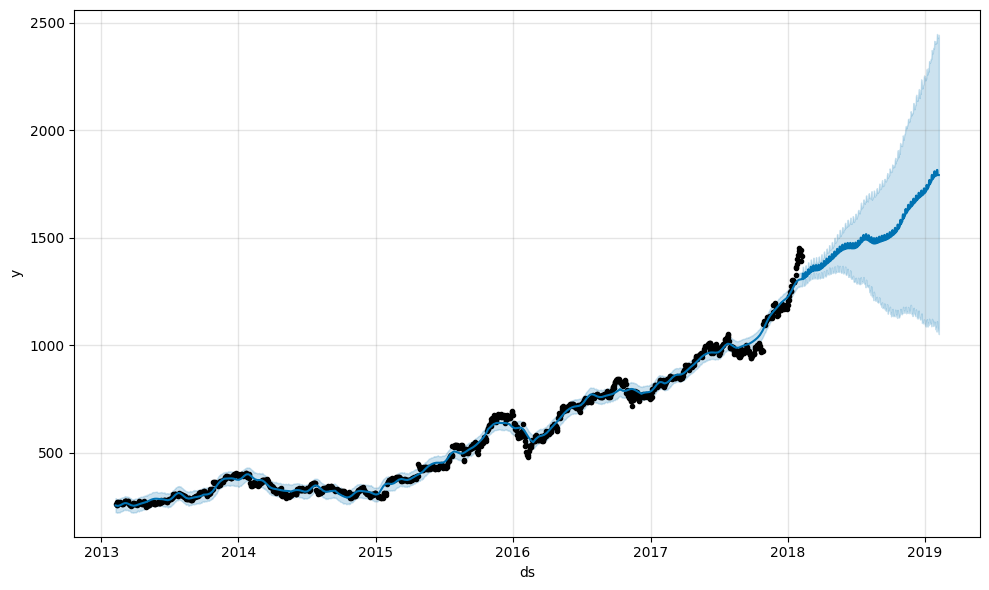

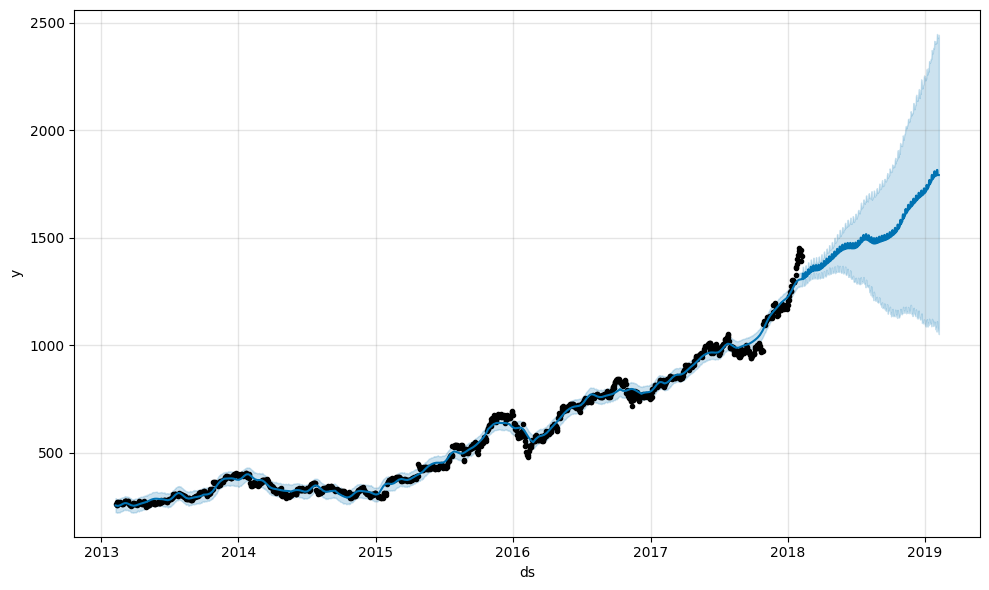

In [120]:
m.plot(forecast)

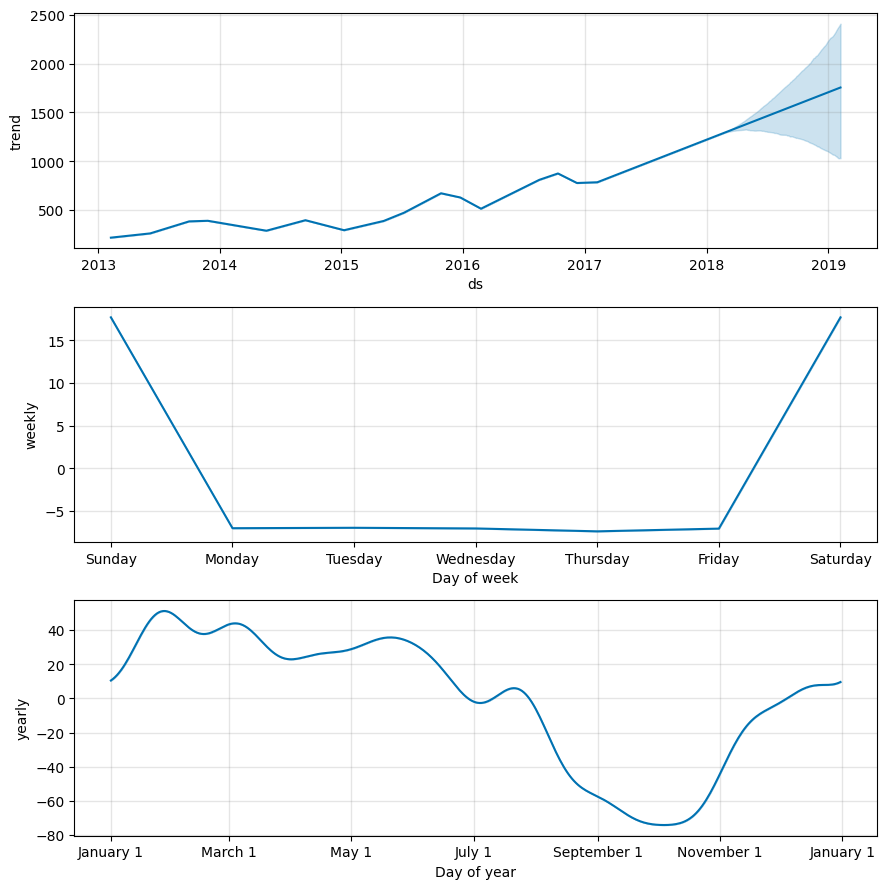

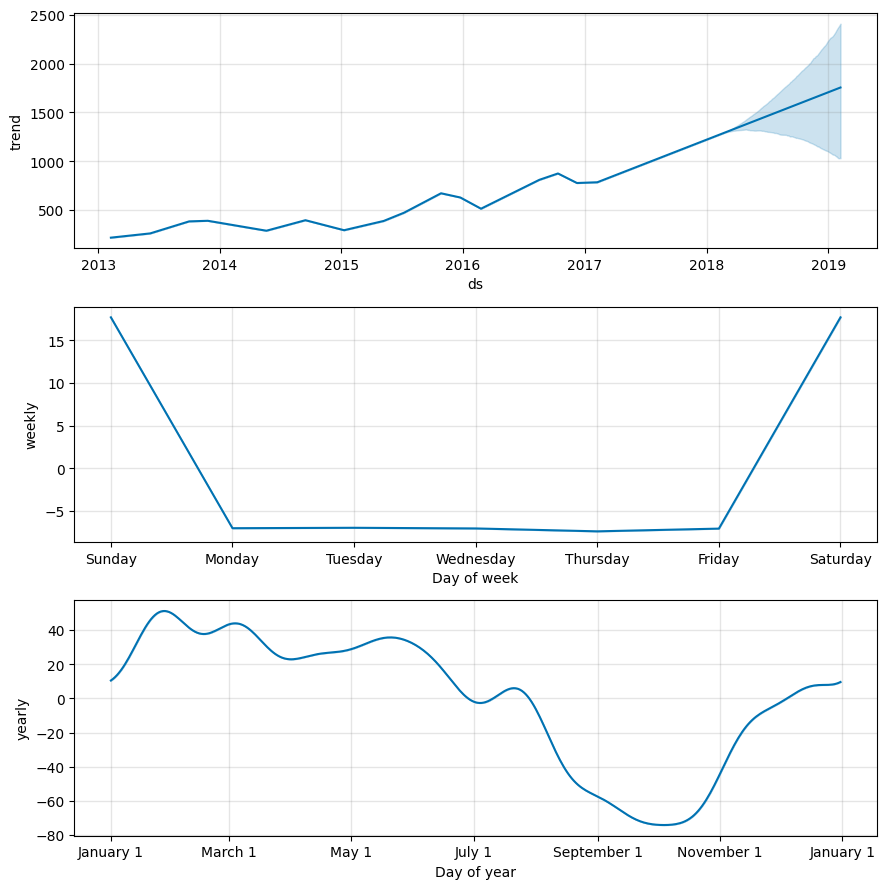

In [121]:
m.plot_components(forecast)

In [122]:
m=Prophet(changepoint_prior_scale=0.01)

In [123]:
m.fit(df2)

11:29:27 - cmdstanpy - INFO - Chain [1] start processing
11:29:27 - cmdstanpy - INFO - Chain [1] done processing


In [124]:
future=m.make_future_dataframe(periods=12, freq='M')

c:\Users\modern14\VSCode\GitHub\my-portfolio\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [125]:
forecast=m.predict(future)

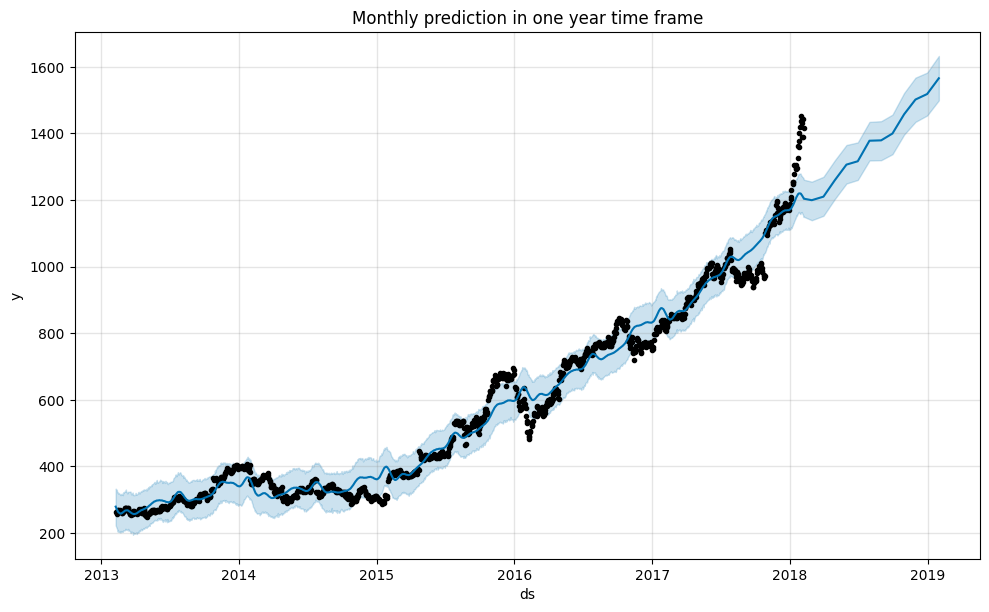

In [126]:
m.plot(forecast)
plt.title('Monthly prediction in one year time frame')
plt.show()